# Communicate Data Findings
## by Shakti Taneja

## Preliminary Wrangling

> Data is taken from https://www.kaggle.com/lava18/google-play-store-apps . 
The data is about the applications available in Google Playstore and is web scraped and contains atleast 10,000 rows
  of data.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# reading the dataset
df = pd.read_csv("googleplaystore.csv")

In [4]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# getting a feel of the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### What is the structure of your dataset?

> The dataset has 13 columns and 10841 rows of data.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest to me in this dataset is to find out the type of apps that should be developed from a commercial point of view. Also which category is being developed right now and which should be developed ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features in the datset that will help are Price, Category, Type and Installs mainly.

#### changing the data type of required columns

In [6]:
# removing $ sign from price values
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))

In [7]:
# removing + and , from Installs column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+').rstrip('aAbBcC'))
df['Installs'] = df['Installs'].str.replace(',','')

In [8]:
# checking to see that the change has been done
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
# finding row containing inappropriate data
df.loc[df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# removing row containing inappropriate data
df.drop(index=10472, inplace = True)

In [15]:
# changing data type of Price and Installs column to float type
df['Price'] = df['Price'].astype('float64')
df['Installs'] = df['Installs'].astype('float64')
df['Reviews'] = df['Reviews'].astype('float64')

In [16]:
# checking to see that change has been done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null float64
Size              10840 non-null object
Installs          10840 non-null float64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [13]:
# describing the values in numerical columns
df.describe()

,Rating,Installs,Price
count,9366.000000,1.084000e+04,10840.000000
mean,4.191757,1.546434e+07,1.027368
std,0.515219,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,5.000000,1.000000e+09,400.000000


In [44]:
# saving clean data
df.to_csv('clean_data.csv')

## Univariate Exploration


#### Q: Which category has the most number of applications been created of ?

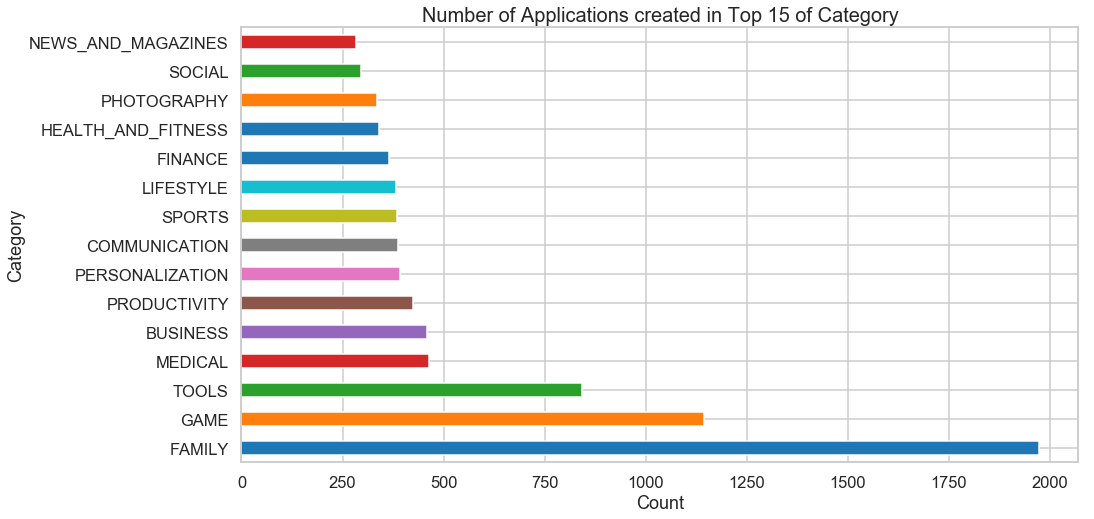

In [128]:
fig = plt.figure(figsize=(15,8))
df.groupby('Category').count()['App'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Number of Applications created in Top 15 of Category",fontsize=20)
plt.ylabel("Category")
plt.xlabel("Count");

> From the above graph we can see that the category ***'Family'*** has the most number of apps followed by 'Game' and 'Tools'. 

#### Q: From which category are applications downloaded the most? 

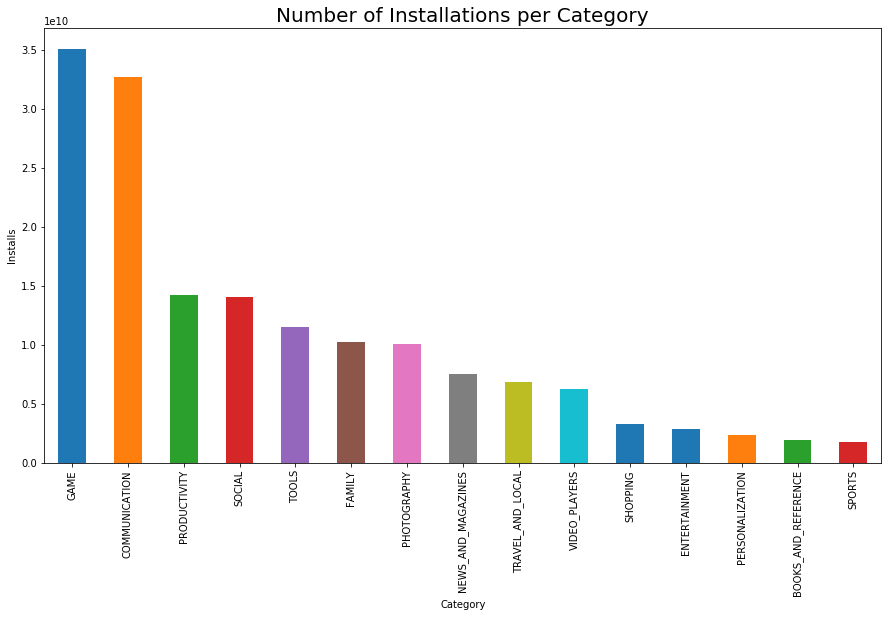

In [20]:
fig = plt.figure(figsize=(15,8))
df.groupby('Category').sum()['Installs'].sort_values(ascending=False).nlargest(15).plot(kind='bar')
plt.title("Number of Installations per Category",fontsize=20)
plt.xlabel("Category")
plt.ylabel("Installs");

> From the graph we can see that ***Games*** has the most number of installations followed by ***Communications*** according to the data

>From the above two graphs we find that the developers are creating applictions of a category that is not installed as often as those of another category .

#### Q: Applications of which category result in the highest net money for that category?

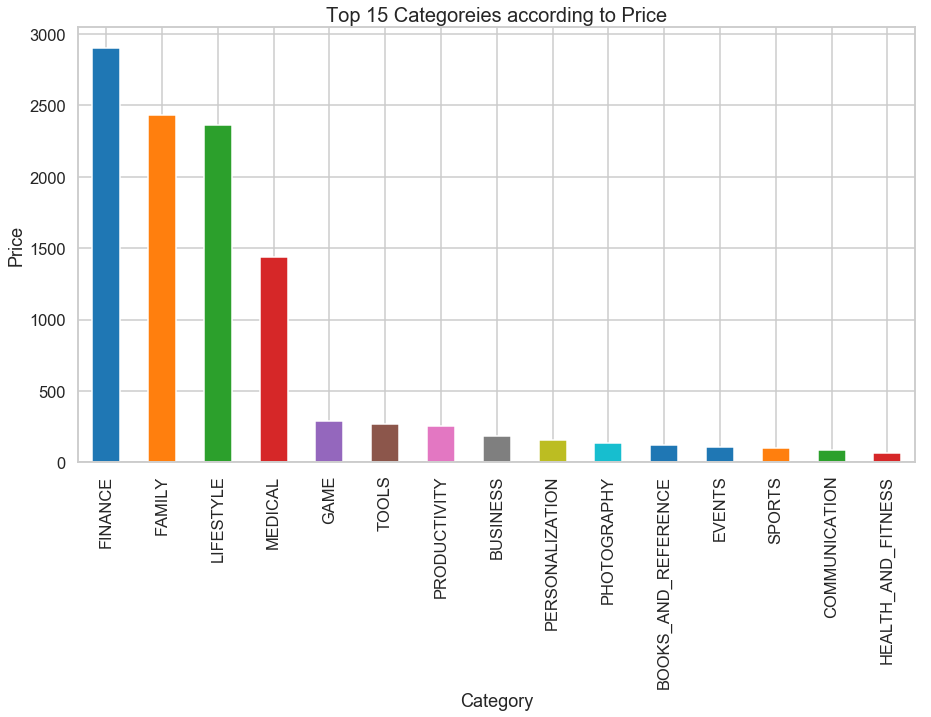

In [129]:
fig = plt.figure(figsize=(15,8))
df.groupby('Category').sum()['Price'].sort_values(ascending=False).nlargest(15).plot(kind='bar')
plt.title("Top 15 Categoreies according to Price",fontsize=20)
plt.xlabel("Category")
plt.ylabel("Price");

> We find that the ***Finance*** category has the highest net amount of revenue if we consider only a single download.
To check how the Price affects the number of installations we plot another graph

#### Q: which category gets the most number of reviews ?

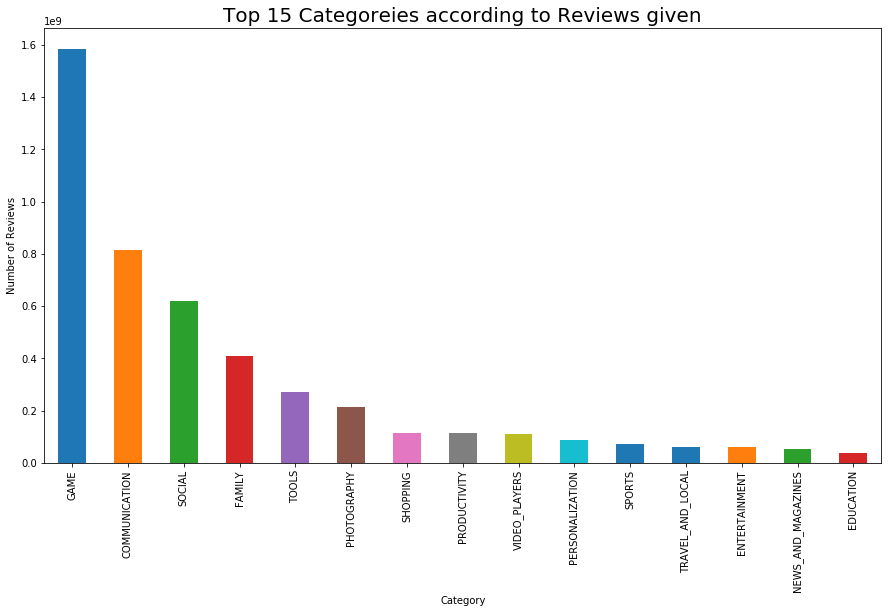

In [17]:
fig = plt.figure(figsize=(15,8))
df.groupby('Category').sum()['Reviews'].sort_values(ascending=False).nlargest(15).plot(kind='bar')
plt.title("Top 15 Categoreies according to Reviews given",fontsize=20)
plt.xlabel("Category")
plt.ylabel("Number of Reviews");

> ***Game*** followed by ***Communication*** and then ***Social*** gets the most number of reviews

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We have found that the most developed category is not the one that caters to the most people. Also that the top 15 categories getting the most number of Reviews follows almost the same pattern as the number of installations 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Befor visualization we had to change the data type , remove parts of the strings in columns. We did this so that visualization could be performed as almost all of the required columns are of the string type

## Bivariate Exploration


#### Q: Does the above observation hold if we consider the number of installations?

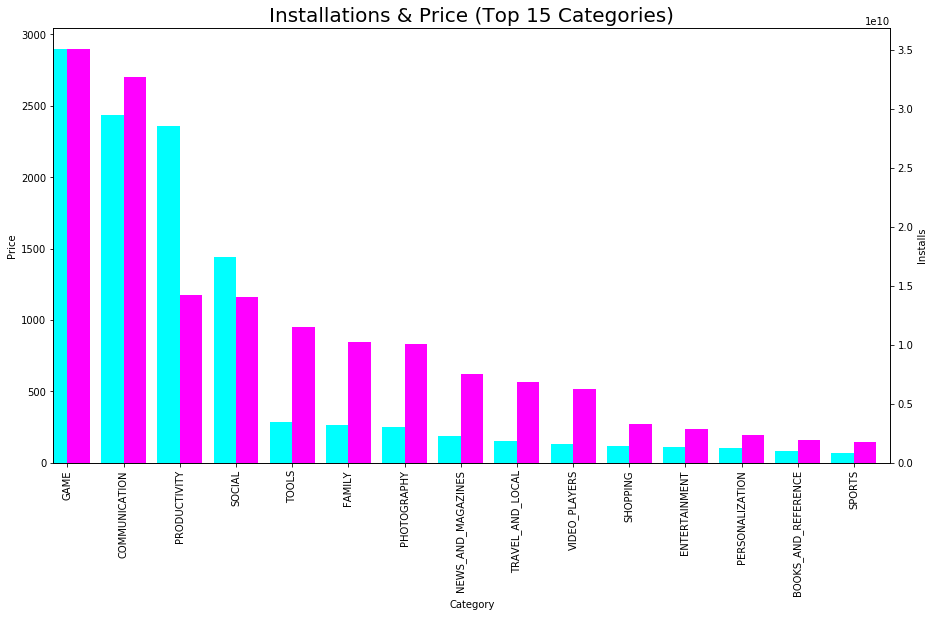

In [14]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
df.groupby(['Category']).sum()['Price'].sort_values(ascending=False).nlargest(15).plot(kind='bar', width = 0.4, ax = ax, position = 1, color= 'cyan')
df.groupby('Category').sum()['Installs'].sort_values(ascending=False).nlargest(15).plot(kind='bar', width = 0.4, ax = ax2, position = 0, color = 'magenta')
plt.title("Installations & Price (Top 15 Categories)",fontsize=20)
ax.set_ylabel('Price')
ax2.set_ylabel('Installs')
plt.xlabel("Category");

> Multiplying the number of installations with the net amount of money for the concerned category we find that the 
 ***Games*** category has the highest revenue instead of category ***Finance*** as we previously saw.

#### Q: How installations affect the number of reviews given ?

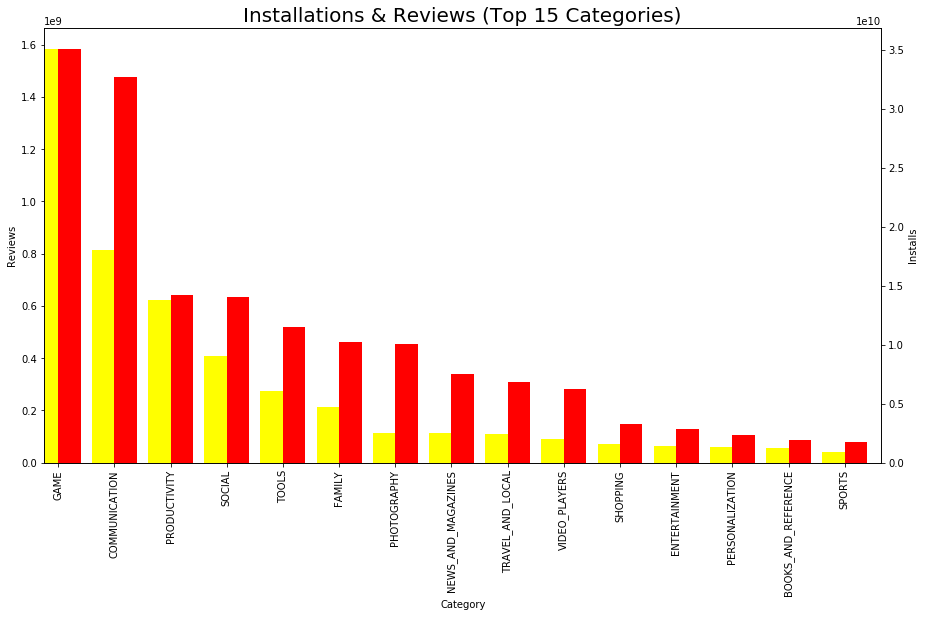

In [23]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
df.groupby(['Category']).sum()['Reviews'].sort_values(ascending=False).nlargest(15).plot(kind='bar', width = 0.4, ax = ax, position = 1, color= 'yellow')
df.groupby('Category').sum()['Installs'].sort_values(ascending=False).nlargest(15).plot(kind='bar', width = 0.4, ax = ax2, position = 0, color = 'red')
plt.title("Installations & Reviews (Top 15 Categories)",fontsize=20)
ax.set_ylabel('Reviews')
ax2.set_ylabel('Installs')
plt.xlabel("Category");

> From this graph we find that the higher the number of installations a category has does not result in getting an equivalent proportion of reviews. Telling us that most people just do not find it in themselves to give a review to an application

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We find that Reviews and Installs and installs and Price have a multiplicative effect on each other.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are not many numeric columns so nothing else has been observed

> Note : we have only used the Paid column and have not concerned ourselves with the Type column as the value for free type being zero does not affect our graphs much at least in the price section. 